In [1]:
# import modules
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

import torchvision
from torchvision import datasets, models, transforms

In [2]:
# import custom moudles
from week_03.plots import show_images, visualize_model
from week_03.tf_functions import train_model

In [3]:
# settings
batch_size = 4
device = 'cpu'

In [4]:
# data transform
transform = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [5]:
# load train and test set
data_dir = 'week_03/data'

# prototype dicts
image_datasets = {}
dataloaders = {}
dataset_sizes = {}

# load data
for x, is_train in zip(['train', 'val'], [True, False]):
    image_datasets[x] = torchvision.datasets.CIFAR10(root='./week_03/data', train=is_train, download=True, transform=transform[x])
    dataloaders[x] = torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4)
    dataset_sizes[x] = len(image_datasets[x])

# get classnames
class_names = image_datasets['train'].classes

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


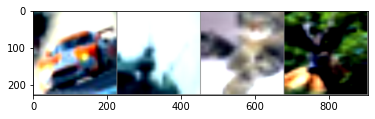

In [6]:
# get some random training images and visualize them
dataiter = iter(dataloaders['train'])
images, labels = next(dataiter)
show_images(images)

## Model Training
Train the pretrained resnet18 model without freezing - all layers

In [7]:
# load pretrained model
model_ft = models.resnet18(pretrained=True)
# number of outputs of resnet18
num_ftrs = model_ft.fc.in_features
# add layer to network
model_ft.fc = nn.Linear(num_ftrs, len(class_names))
# optimize model for device
model_ft = model_ft.to(device)

C:\Python3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Python3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [8]:
# set criterion
criterion = nn.CrossEntropyLoss()

In [9]:
# set optimizer
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

In [10]:
# set epsion decay (learning rate)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [8]:
# train the (pretrained) model
model_ft = train_model(model_ft, dataloaders, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=25, device=device)

Epoch 0/24
----------


KeyboardInterrupt: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


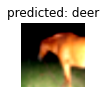

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


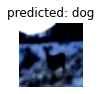

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


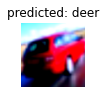

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


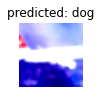

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


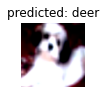

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


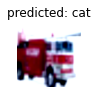

In [11]:
visualize_model(model_ft, dataloaders, class_names, device)

## Model Training
Train the pretrained resnet18 model with freezing - only output layer

In [14]:
# load pretrained model
model_conv = torchvision.models.resnet18(pretrained=True)
# freeze all layers
for param in model_conv.parameters():
    param.requires_grad = False
# number of outputs of resnet18
num_ftrs = model_ft.fc.in_features
# add layer to network (is not fozen, by default)
model_conv.fc = nn.Linear(num_ftrs, len(class_names))
# optimize model for device
model_conv = model_conv.to(device)

In [15]:
model_conv = train_model(model_ft, dataloaders, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=25, device=device)

Epoch 0/24
----------


KeyboardInterrupt: 

In [ ]:
visualize_model(model_conv)